<a href="https://colab.research.google.com/github/leeJoonseob/Rabble/blob/develop/spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import seaborn as sns

In [24]:
spam_virus = pd.read_csv("/content/spam_virus.csv")

In [25]:
print(spam_virus.head())

         수신일자   수신시간  메일종류                                               메일제목  \
0  2023-01-01  00:03    스팸  Add These Leaves To Every Drink And Speed Up W...   
1  2023-01-01  00:31    스팸                                     Wire and Cable   
2  2023-01-01  00:38    스팸   Poop Instantly No Matter How Constipated You Are   
3  2023-01-01  02:29  바이러스                                      С Наступающим   
4  2023-01-01  02:42    스팸                       jay, Do not just watch, shop   

                                                  첨부  
0                                                 없음  
1                                                 없음  
2                                                 없음  
3  Предложение.docx (18.7 K), Offer.docx (16.8 K)...  
4                                                 없음  


In [26]:
import matplotlib.pyplot as plt

In [27]:
spam_virus['수신일자'] = pd.to_datetime(spam_virus['수신일자'])
spam_virus['수신일자'] = spam_virus['수신일자'].astype(int) / 10**9

In [28]:
spam_virus['수신시간'] = spam_virus['수신시간'].apply(lambda x: f"{x}:00" if len(x.split(':')) == 2 else x)
spam_virus['수신시간'] = pd.to_timedelta(spam_virus['수신시간']).dt.total_seconds()

In [29]:
mapping = {'스팸': 1, '바이러스': 2}

spam_virus['메일종류'] = spam_virus['메일종류'].map(mapping)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화 수행
vectorizer = TfidfVectorizer(max_features=100)  # 최대 100개의 특성을 사용
tfidf_matrix = vectorizer.fit_transform(spam_virus['메일제목'])

# TF-IDF 결과를 데이터프레임으로 변환
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=spam_virus.index
)

In [31]:
# '메일제목' 열을 삭제하고 TF-IDF 데이터로 대체
spam_virus = spam_virus.drop('메일제목', axis=1)
spam_virus = pd.concat([spam_virus, tfidf_df], axis=1)

In [33]:
spam_virus['첨부'] = spam_virus['첨부'].map(lambda x: 1 if x != '없음' else 0)

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52392 (\N{HANGUL SYLLABLE CEOM}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/u

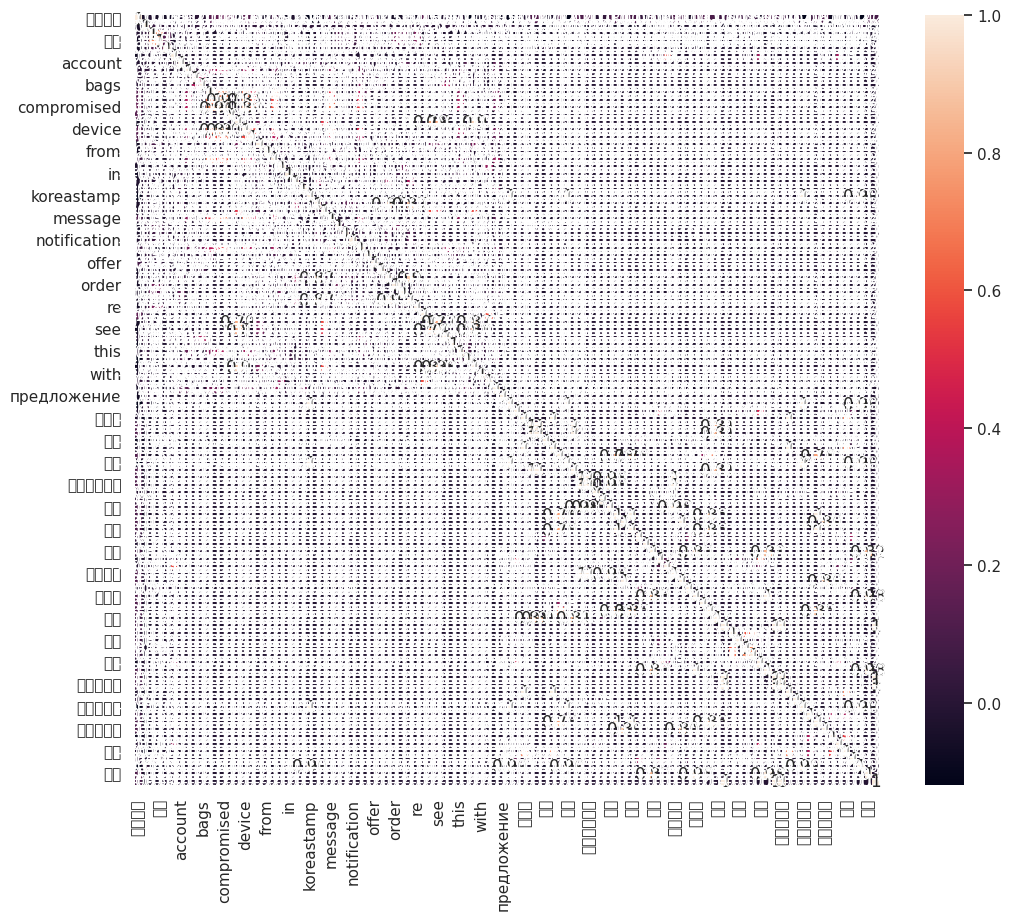

In [34]:
sns.set(rc={'figure.figsize':(12,10)})
correlation_matrix = spam_virus.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()


In [36]:
print(spam_virus.head(20))

            수신일자     수신시간  메일종류  첨부  2023  50명한정  account       and   at  \
0   1.672531e+09    180.0     1   0   0.0    0.0      0.0  0.732567  0.0   
1   1.672531e+09   1860.0     1   0   0.0    0.0      0.0  1.000000  0.0   
2   1.672531e+09   2280.0     1   0   0.0    0.0      0.0  0.000000  0.0   
3   1.672531e+09   8940.0     2   1   0.0    0.0      0.0  0.000000  0.0   
4   1.672531e+09   9720.0     1   0   0.0    0.0      0.0  0.000000  0.0   
5   1.672531e+09  10800.0     1   0   0.0    0.0      0.0  0.000000  0.0   
6   1.672531e+09  10800.0     1   0   0.0    0.0      0.0  0.000000  0.0   
7   1.672531e+09  10860.0     1   0   0.0    0.0      0.0  0.000000  0.0   
8   1.672531e+09  11220.0     1   0   0.0    0.0      0.0  0.000000  0.0   
9   1.672531e+09  22200.0     1   1   0.0    0.0      0.0  0.000000  0.0   
10  1.672531e+09  22200.0     1   1   0.0    0.0      0.0  0.000000  0.0   
11  1.672531e+09  22260.0     1   1   0.0    0.0      0.0  0.000000  0.0   
12  1.672531

In [38]:
# TF-IDF 열만 선택 (수신일자, 수신시간, 메일종류, 첨부 제외)
tfidf_columns = spam_virus.columns[4:]

# 각 단어(열)의 TF-IDF 값 합계 계산
word_importance = spam_virus[tfidf_columns].sum().sort_values(ascending=False)

# 상위 20개 단어 출력
print(word_importance.head(50))

광고             3783.950515
your           3032.982970
you            2896.190673
to             2459.799198
for            1974.624743
re             1885.752121
회원             1820.463041
하셨습니다          1809.138278
가입을            1808.854900
koreastamp     1807.831545
께서             1806.479454
this           1547.546761
안내             1509.713909
and            1442.232379
2023           1435.060304
the            1375.420157
recorded       1353.670721
주식             1314.637916
or             1288.644930
posa           1285.098427
order          1255.600292
cooperation    1253.102015
предложение    1192.000000
new            1172.248651
kr             1145.530642
payment        1079.528046
in             1077.876921
now            1069.680127
of             1058.778339
한번              960.920849
has             924.685772
offer           899.357259
드립니다            894.536873
해외선물            871.333928
is              867.227611
선착순             866.028120
email           833.027732
이